## Business case: Credit / K Nearest Neighbor
A bank is attempting predict whether a customer will repay a loan or not. Utilzing K Nearest Neighbor, a machine learning model was developed.

## Necessary Imports

In [1]:
import pandas as pd
import seaborn as sn
sn.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Loading, examining and exploring the data loaded into Python.

In [2]:
#This data has 4 predicitors (columns) and 2000 records (rows)
#Column = attribute/ dimension
#Target = Prediction
credit_df = pd.read_csv("original.csv")
credit_df

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [3]:
credit_df.head()
credit_df.tail()
credit_df.shape
credit_df.count()
credit_df['default'].value_counts()

0    1717
1     283
Name: default, dtype: int64

## Identify unwanted rows

In [4]:
credit_df.dtypes

clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object

## Examining the Correlation of the dataset

In [5]:
corrMatrix = credit_df.corr()
print (corrMatrix)

          clientid    income       age      loan   default
clientid  1.000000  0.039280 -0.014704  0.018931 -0.020145
income    0.039280  1.000000 -0.033687  0.441117  0.002284
age      -0.014704 -0.033687  1.000000  0.002309 -0.429759
loan      0.018931  0.441117  0.002309  1.000000  0.377160
default  -0.020145  0.002284 -0.429759  0.377160  1.000000


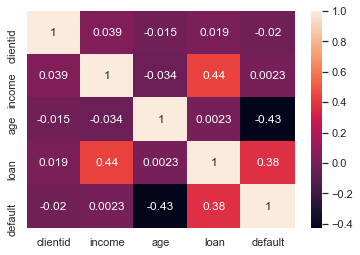

In [6]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Remove unwanted column(s)

In [7]:
#Client id was removed as a predictor, as this will more than likely provide little to no value.
credit_df.columns

feature_df = credit_df[['income', 'loan']]

#Independent variable
X = np.asarray(feature_df)

#Dependent variable
y = np.asarray(credit_df['default'])

X[0:5]

array([[66155.92509508,  8106.53213129],
       [34415.15396582,  6564.74501768],
       [57317.17006303,  8020.95329639],
       [42709.53420084,  6103.64226014],
       [66952.68884534,  8770.0992352 ]])

## Divide the data as Train/Test dataset

In [8]:
#We are attempting to classify data with undefined labels; therefore we are setting aside 25% of the samples in the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#1500 x2
X_train.shape

#1500 x 1
y_train.shape

#500 x 2
X_test.shape

#500 x 1
y_test.shape

(500,)

## KNN algorithm (Scikit-learn)




In [9]:
#By default the KNeighborsClassifier looks for 5 nearest neighbors; we are telling the classifier to use Euclidean distance for determining the proximnity between neighboring points.
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [13]:
y_predict = knn.predict(X_test)

In [14]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [51]:
data = np.concatenate((X_test,y_test[:,np.newaxis]),axis=1) 

In [57]:
ncredit_df = pd.DataFrame(data=data, columns=['income', 'loan', 'default' ])

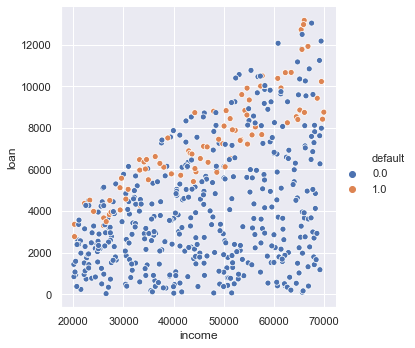

In [61]:
#Utilizing the newly trained model, we are predicitng whether a client is going to default or not default given its mean comp
sn.relplot(x='income', y='loan', hue ='default', data=ncredit_df)

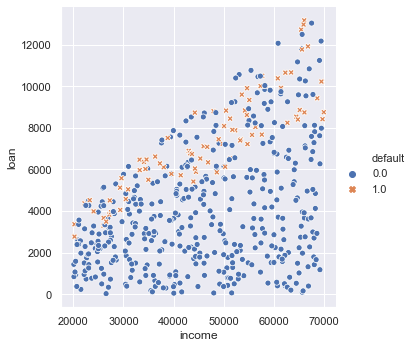

In [64]:
#Emphasizing the difference between the classes and improve accessibility
sn.relplot(x='income', y='loan', hue='default', style='default', data=ncredit_df)

In [67]:
#Further evaluating the model looking at the confusion matrix.
confusion_matrix(y_test, y_predict)

array([[397,  20],
       [ 68,  15]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       417
           1       0.43      0.18      0.25        83

    accuracy                           0.82       500
   macro avg       0.64      0.57      0.58       500
weighted avg       0.78      0.82      0.79       500



## Conclusion
K Nearest Neighbor was used because it will not require any additional training when new data becomes available as it determines the K closest points according to some distance metric and then places the new data point (customer’s income and income information) into the same category (default) as the majority. Client id and age was removed as they were deemed irrelevant, due to client id being generated and assigned at random and age ultimately not really playing a role based on the correlation matrix. 